#RESUME CLASSIFIER

#DESCRIPTION -> It simulates how companies might automatically screen candidates using resume parsing and classification. The final model can help automate resume filtering, and optionally recommend top resumes based on relevance.

#SCOPE
### ✅ Scope
- Load and process resumes (PDF or TXT format)
- Extract and clean text from resumes
- Perform NLP preprocessing (stopwords, lemmatization, etc.)
- Convert resume text into features (TF-IDF, embeddings)
- Train classification models to label resume roles
- Evaluate performance using standard ML metrics
### ❌ Out of Scope
- Real-time production-ready deployment pipelines
- Building a full ATS (Applicant Tracking System)
- Training large-scale language models from scratch

#IMPORTS

In [5]:
#Import Pandas And Numpy
import numpy as np
import pandas as pd

In [6]:
#Import Matplotlib And Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#Import Modules From sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [8]:
#Import nltk
import nltk

In [10]:
#Download stopwords and Wordnet
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


In [10]:
#Import string
import string

In [11]:
#Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

In [12]:
#Import re
import re

In [28]:
#Download punkt
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


In [36]:
#Warnings 
import warnings
warnings.filterwarnings('ignore')

#THE DATA

In [39]:
#Read resume.csv in a df
df = pd.read_csv('../DATA/Resume.csv')

In [40]:
#Head of df
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [18]:
#Info on df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [19]:
#Describe on df
df.describe()

,ID
count,2.484000e+03
mean,3.182616e+07
std,2.145735e+07
min,3.547447e+06
25%,1.754430e+07
50%,2.521031e+07
75%,3.611444e+07
max,9.980612e+07


#DATA QUALITY CHECK

<Axes: >

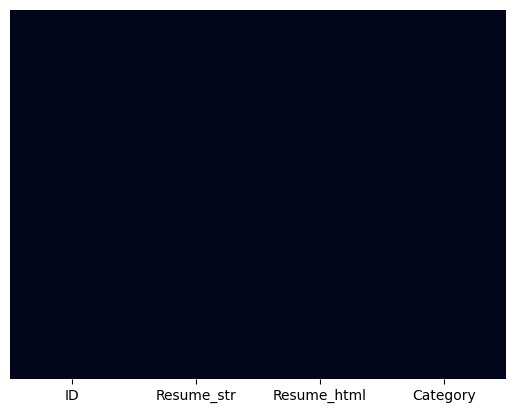

In [33]:
#Heatmap to check missing values in df
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [35]:
#Null values each column
df.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [37]:
#Check for duplicate rows
if(len(df.drop_duplicates())==df.shape[0]):
    print('No duplicates in df')

No duplicates in df


#Extracting Text from PDF Resumes

In [43]:
#Import fitz
import fitz

In [44]:
#Getting file names
my_dict = {}
for i in list(df['Category'].unique()):
    my_dict[i]=list(df[df['Category']==i]['ID'])

In [45]:
#Extractig text from pdf
data_list = []
for i in list(df['Category'].unique()):
    muy = my_dict[i]
    for j in muy:
        sample = {}
        sample['filename']=str(j)+'.pdf'
        sample['category']=i
        my_path = '../DATA/data/'+i+'/'+str(j)+'.pdf'
        doc=fitz.open(my_path)
        text = ""
        for page in doc:
            text+=page.get_text()
        sample['text']=text
        doc.close()
        data_list.append(sample)

In [49]:
#Coverting data_list to a df
new_df = pd.DataFrame(data_list)
new_df.head()

,filename,category,text
0,16852973.pdf,HR,HR ADMINISTRATOR/MARKETING ASSOCIATE HR ADMINI...
1,22323967.pdf,HR,"HR SPECIALIST, US HR OPERATIONS\nSummary\nVers..."
2,33176873.pdf,HR,HR DIRECTOR\nSummary\nOver 20 years experience...
3,27018550.pdf,HR,"HR SPECIALIST\nSummary\nDedicated, Driven, and..."
4,17812897.pdf,HR,HR MANAGER\nSkill Highlights\nHR SKILLS\nHR De...


In [51]:
#Shape of new_df
new_df.shape

(2484, 3)

#TEXT CLEANING AND PROCESSING 

In [54]:
#Making lowercase and removing punctuation and digits
def clean_text1(test_str):
    test_str = test_str.lower()
    ref1_str = ""
    for i in test_str:
        if(i not in string.punctuation):
            ref1_str+=i
    ref2_str = ""
    for j in ref1_str:
        if(j not in string.digits):
            ref2_str+=j
    return ref2_str

In [56]:
#Removing stopwords
banned = nltk.corpus.stopwords.words('english')
def clean_text3(test_str):
    final_lst = []
    myy = re.split(r'\s+',test_str)
    for j in myy:
        if j not in banned:
            final_lst.append(j)
    return ' '.join(final_lst)

In [58]:
def clean_text4(test_str):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(test_str)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [60]:
#Save cleaned text
new_df['cleaned_text']=new_df['text'].apply(clean_text1).apply(clean_text3).apply(clean_text4)

In [61]:
new_df['cleaned_text']

0       hr administratormarketing associate hr adminis...
1       hr specialist u hr operation summary versatile...
2       hr director summary year experience recruiting...
3       hr specialist summary dedicated driven dynamic...
4       hr manager skill highlight hr skill hr departm...
                              ...                        
2479    rank sgte non commissioned officer charge brig...
2480    government relation communication organization...
2481    geek squad agent professional profile support ...
2482    program director office manager summary highly...
2483    storekeeper ii professional summary purpose do...
Name: cleaned_text, Length: 2484, dtype: object

#EXPLORATORY DATA ANALYSIS

<Axes: xlabel='Category'>

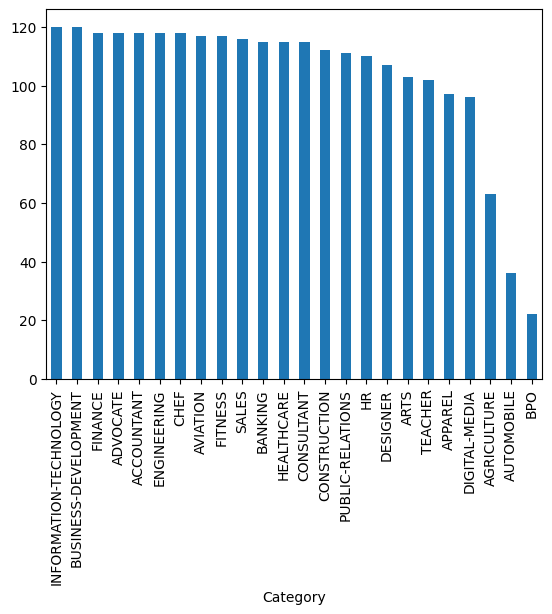

In [61]:
#Bar chart to visualize the distribution of job roles in the dataset
df['Category'].value_counts().plot(kind='bar')

In [62]:
#Calculate Total Words In Resume
def convat(n):
    return len(n.split(' '))

In [63]:
#Calculating mean total words in resume
c1 = []
c2 = []
for i in list(df['Category'].unique()):
    c1.append(i)
    c2.append(new_df[new_df['category']==i]['cleaned_text'].apply(convat).mean())
len_df = pd.DataFrame()
len_df['Category']=c1
len_df['Mean Length']=c2
len_df

,Category,Mean Length
0,HR,629.072727
1,DESIGNER,529.878505
2,INFORMATION-TECHNOLOGY,679.458333
3,TEACHER,510.500000
4,ADVOCATE,615.694915
5,BUSINESS-DEVELOPMENT,565.183333
6,HEALTHCARE,647.669565
7,FITNESS,522.888889
8,AGRICULTURE,613.841270
9,BPO,697.727273


<Axes: xlabel='Category'>

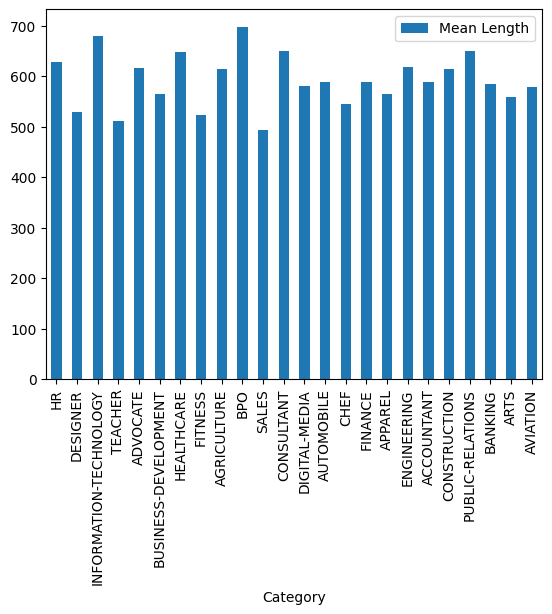

In [67]:
#Plot of len_df
len_df.plot(kind='bar',x='Category')

<Axes: xlabel='category', ylabel='length'>

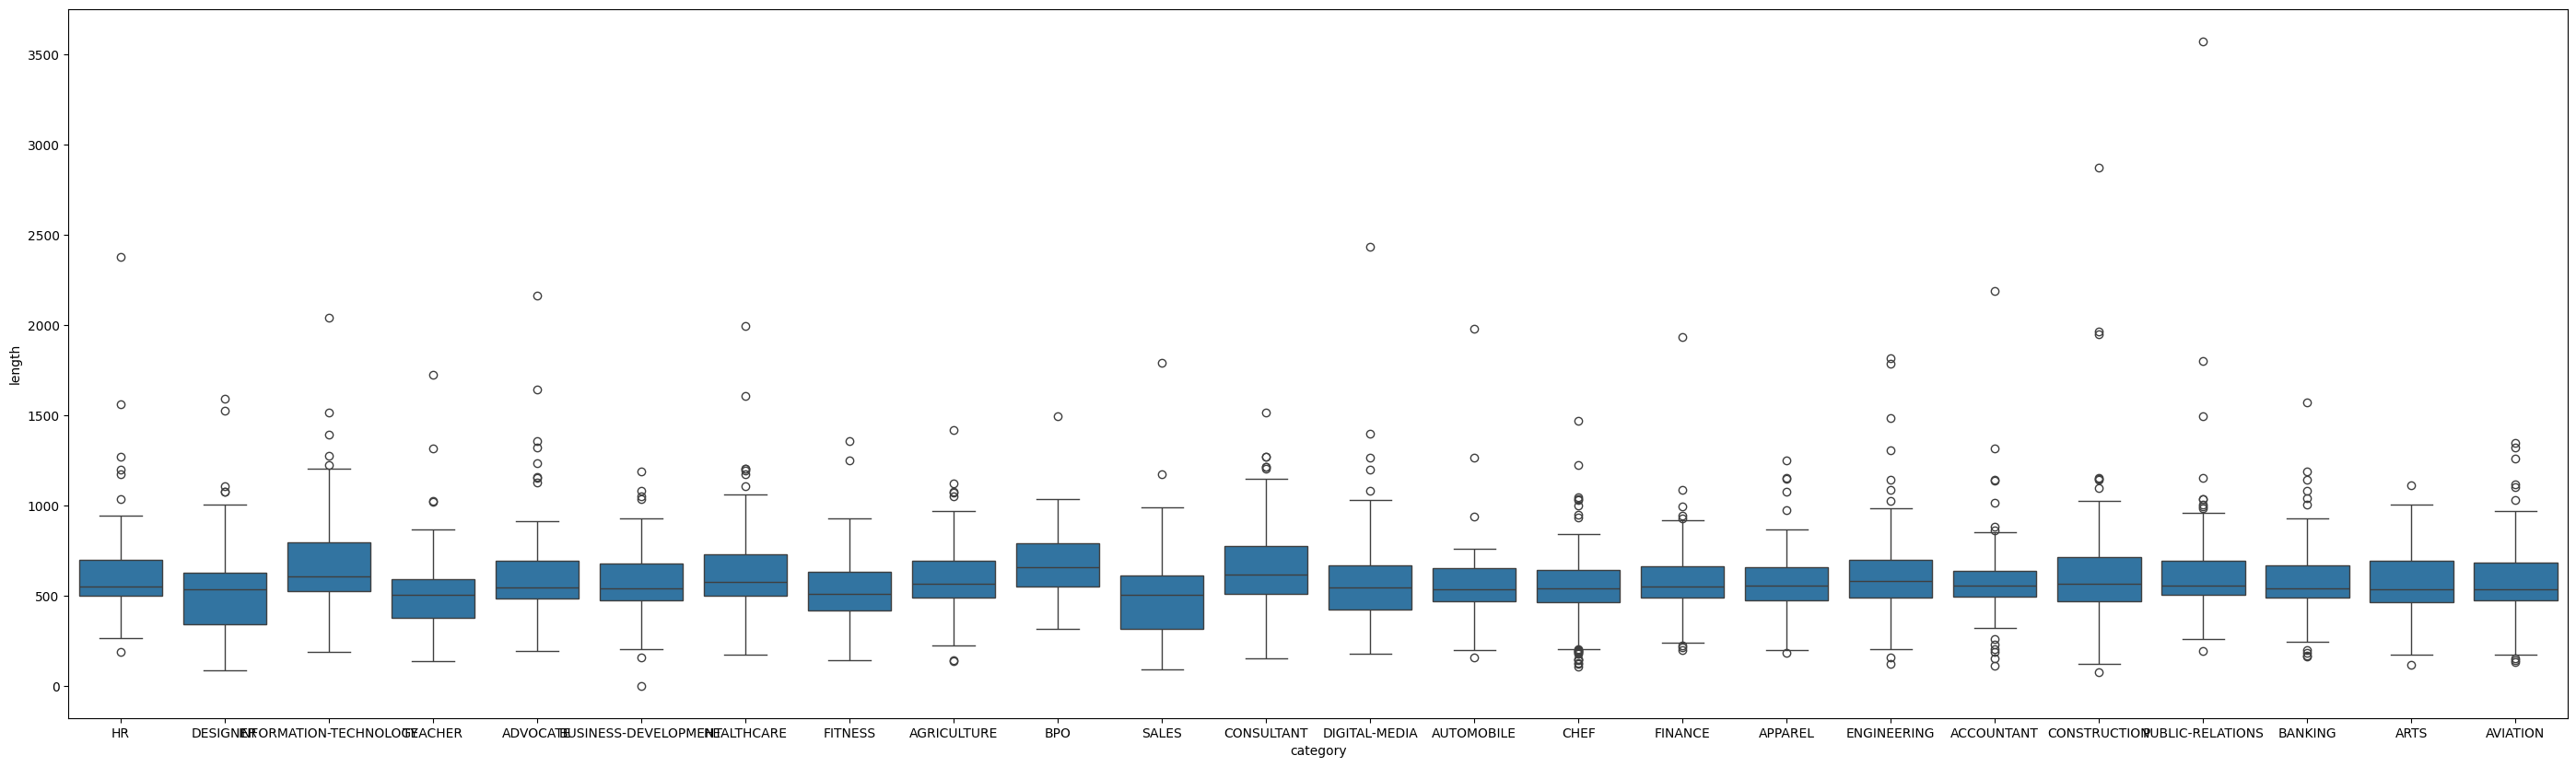

In [69]:
#Boxplot of text lengths per category
plt.figure(figsize=(35,10))
my_df = new_df
my_df['length']=new_df['cleaned_text'].apply(convat)
sns.boxplot(data=my_df,x='category',y='length')

In [71]:
#Creating main dictionary for every category
def count_words(n):
    dictt = {}
    for i in n:
        for j in i:
            if(j in dictt.keys()):
                dictt[j]+=1
            else:
                dictt[j]=1
    return dictt

In [73]:
#Splitting String
def convertt(n):
    return n.split(' ')

In [75]:
#Most Common Word Per Category
for i in list(new_df['category'].unique()):
    main_lst=list(new_df[new_df['category']==i]['cleaned_text'].apply(convertt))
    my_dict = count_words(main_lst)
    max_key = max(my_dict, key=my_dict.get)
    print(i+' -> '+max_key)

HR -> employee
DESIGNER -> design
INFORMATION-TECHNOLOGY -> system
TEACHER -> student
ADVOCATE -> customer
BUSINESS-DEVELOPMENT -> sale
HEALTHCARE -> state
FITNESS -> state
AGRICULTURE -> state
BPO -> management
SALES -> customer
CONSULTANT -> management
DIGITAL-MEDIA -> marketing
AUTOMOBILE -> customer
CHEF -> food
FINANCE -> financial
APPAREL -> state
ENGINEERING -> engineering
ACCOUNTANT -> accounting
CONSTRUCTION -> project
PUBLIC-RELATIONS -> medium
BANKING -> management
ARTS -> state
AVIATION -> state


HR -> 580723
DESIGNER -> 457205
INFORMATION-TECHNOLOGY -> 675820
TEACHER -> 429745
ADVOCATE -> 594815
BUSINESS-DEVELOPMENT -> 559848
HEALTHCARE -> 625725
FITNESS -> 500155
AGRICULTURE -> 319590
BPO -> 123955
SALES -> 459581
CONSULTANT -> 613149
DIGITAL-MEDIA -> 451861
AUTOMOBILE -> 173683
CHEF -> 513004
FINANCE -> 573968
APPAREL -> 442160
ENGINEERING -> 594938
ACCOUNTANT -> 573953
CONSTRUCTION -> 568589
PUBLIC-RELATIONS -> 593432
BANKING -> 550739
ARTS -> 469652
AVIATION -> 561218


<Axes: xlabel='Category'>

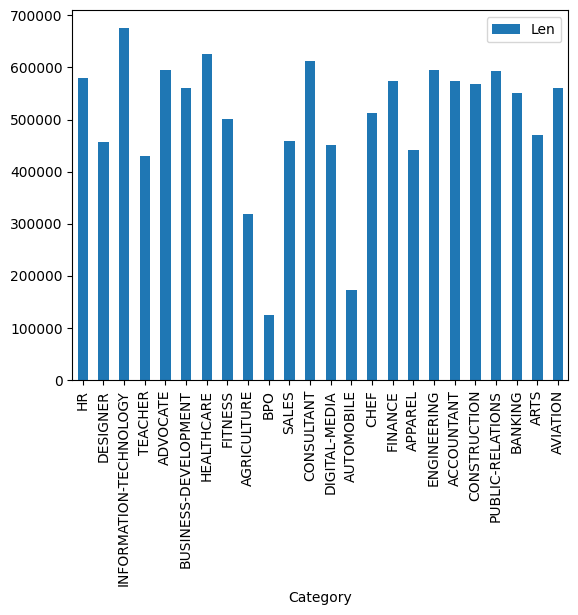

In [76]:
#Category vs. total text length
again_df = pd.DataFrame()
c3 = []
c4 = []
for i in list(new_df['category'].unique()):
    c3.append(i)
    c4.append(new_df[new_df['category']==i]['cleaned_text'].apply(len).sum())
    print(i + ' -> ' + str(new_df[new_df['category']==i]['cleaned_text'].apply(len).sum()))
again_df['Category']=c3
again_df['Len']=c4
again_df.plot(kind='bar',x='Category')

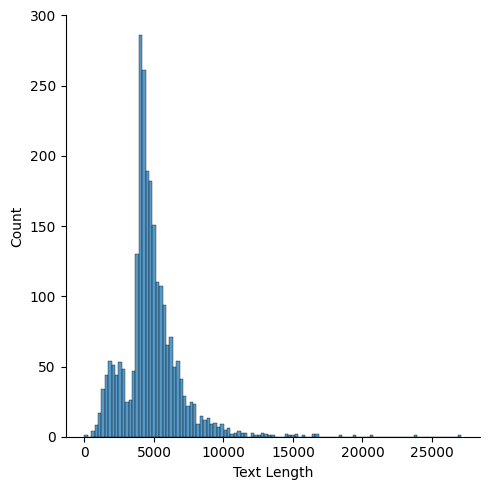

In [78]:
#Distribution plot of text lengths
new_df['Text Length']=new_df['cleaned_text'].apply(len)
sns.displot(data=new_df, x='Text Length')

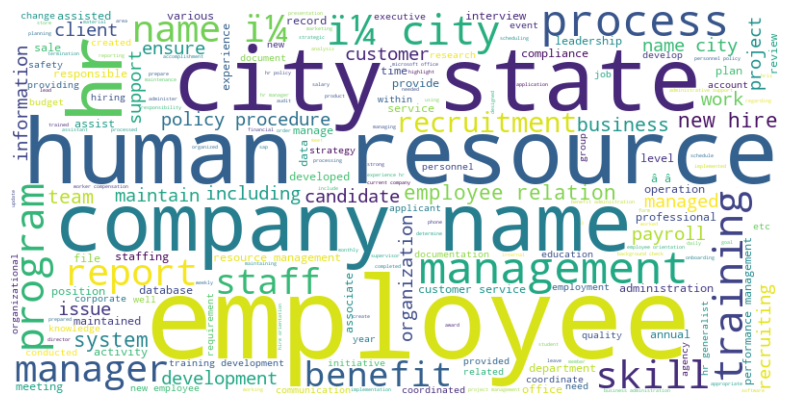

In [80]:
#WordCloud For HR category
from wordcloud import WordCloud
joined_text = " ".join(list(new_df[new_df['category']=='HR']['cleaned_text']))
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(joined_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

In [82]:
#Wordcloud for each category

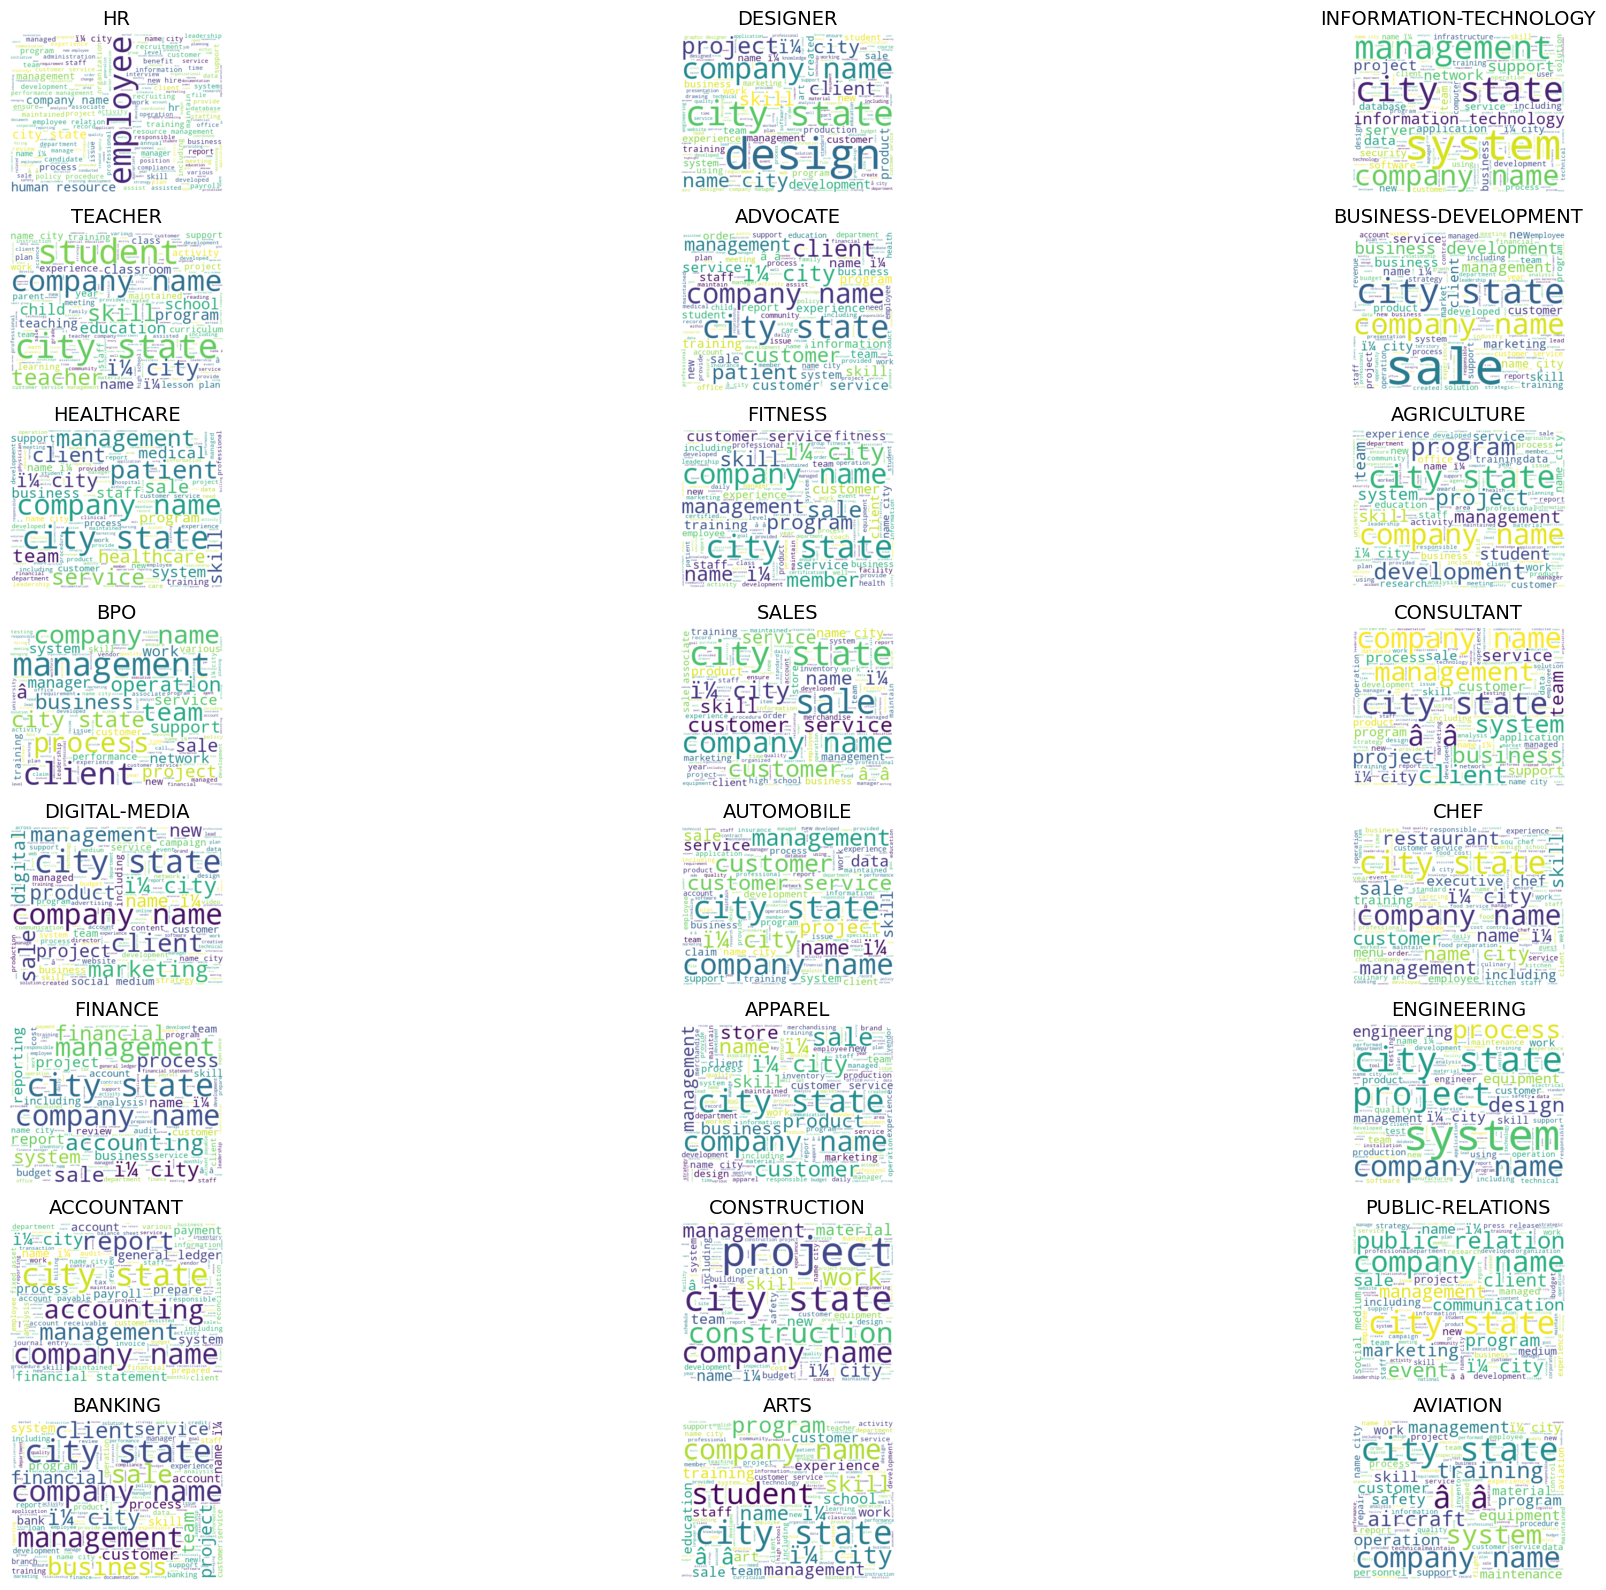

In [89]:
text_list = []
myy = list(new_df['category'].unique())
idx = 0
for i in list(new_df['category'].unique()):
    text_list.append(" ".join(list(new_df[new_df['category']==i]['cleaned_text'])))
# Create subplots: 2 rows, 3 columns
fig, axes = plt.subplots(8,3, figsize=(24, 16))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Generate and display a word cloud in each subplot
for i in range(24):
    wc = WordCloud(width=400, height=300, background_color='white').generate(text_list[i])
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(myy[idx], fontsize=14)
    idx+=1

plt.tight_layout()
plt.show()


In [90]:
#Max occuring bigram for each category
for i in list(new_df['category'].unique()):
    joined_text = " ".join(list(new_df[new_df['category']==i]['cleaned_text']))
    main_lst = joined_text.split(' ')
    dictt = {}
    for j in nltk.bigrams(main_lst): 
        if(j in dictt.keys()):
            dictt[j]+=1
        else:
            dictt[j]=1
    max_key = max(dictt, key=dictt.get)
    print(i + ' -> '+str(max_key))

HR -> ('human', 'resource')
DESIGNER -> ('city', 'state')
INFORMATION-TECHNOLOGY -> ('city', 'state')
TEACHER -> ('city', 'state')
ADVOCATE -> ('city', 'state')
BUSINESS-DEVELOPMENT -> ('city', 'state')
HEALTHCARE -> ('city', 'state')
FITNESS -> ('city', 'state')
AGRICULTURE -> ('city', 'state')
BPO -> ('company', 'name')
SALES -> ('city', 'state')
CONSULTANT -> ('city', 'state')
DIGITAL-MEDIA -> ('city', 'state')
AUTOMOBILE -> ('city', 'state')
CHEF -> ('city', 'state')
FINANCE -> ('city', 'state')
APPAREL -> ('city', 'state')
ENGINEERING -> ('city', 'state')
ACCOUNTANT -> ('city', 'state')
CONSTRUCTION -> ('city', 'state')
PUBLIC-RELATIONS -> ('city', 'state')
BANKING -> ('city', 'state')
ARTS -> ('city', 'state')
AVIATION -> ('city', 'state')


In [96]:
#Max occuring trigram for each category
for i in list(new_df['category'].unique()):
    joined_text = " ".join(list(new_df[new_df['category']==i]['cleaned_text']))
    main_lst = joined_text.split(' ')
    dictt = {}
    for j in nltk.trigrams(main_lst): 
        if(j in dictt.keys()):
            dictt[j]+=1
        else:
            dictt[j]=1
    max_key = max(dictt, key=dictt.get)
    print(i + ' -> '+str(max_key))

HR -> ('ï¼\u200b', 'city', 'state')
DESIGNER -> ('company', 'name', 'city')
INFORMATION-TECHNOLOGY -> ('ï¼\u200b', 'city', 'state')
TEACHER -> ('ï¼\u200b', 'city', 'state')
ADVOCATE -> ('ï¼\u200b', 'city', 'state')
BUSINESS-DEVELOPMENT -> ('ï¼\u200b', 'city', 'state')
HEALTHCARE -> ('ï¼\u200b', 'city', 'state')
FITNESS -> ('ï¼\u200b', 'city', 'state')
AGRICULTURE -> ('ï¼\u200b', 'city', 'state')
BPO -> ('company', 'name', 'city')
SALES -> ('ï¼\u200b', 'city', 'state')
CONSULTANT -> ('â', 'â', 'â')
DIGITAL-MEDIA -> ('ï¼\u200b', 'city', 'state')
AUTOMOBILE -> ('ï¼\u200b', 'city', 'state')
CHEF -> ('ï¼\u200b', 'city', 'state')
FINANCE -> ('ï¼\u200b', 'city', 'state')
APPAREL -> ('ï¼\u200b', 'city', 'state')
ENGINEERING -> ('ï¼\u200b', 'city', 'state')
ACCOUNTANT -> ('ï¼\u200b', 'city', 'state')
CONSTRUCTION -> ('ï¼\u200b', 'city', 'state')
PUBLIC-RELATIONS -> ('ï¼\u200b', 'city', 'state')
BANKING -> ('ï¼\u200b', 'city', 'state')
ARTS -> ('ï¼\u200b', 'city', 'state')
AVIATION -> ('â', 'â',

#Feature Extraction with TF-IDF 

In [62]:
#Necessary Imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [66]:
#TF
tf_object = CountVectorizer()

In [68]:
#Fit on data
tf_object.fit(new_df['cleaned_text'])

CountVectorizer()

In [70]:
#Vocabulary Length
len(tf_object.vocabulary_)

46932

In [72]:
#Applying transform on our data
tf_vals=tf_object.transform(new_df['cleaned_text'])

In [73]:
#IDF
idf_object = TfidfTransformer()

In [74]:
#Fit idf_object on data
idf_object.fit(tf_vals)

TfidfTransformer()

In [76]:
#Transform on data
idf_vals = idf_object.transform(tf_vals)

#TRAIN TEST SPLIT

In [81]:
#Define x and y
y = new_df['category']
x = idf_vals

In [83]:
#Perform train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Model Building: Multinomial Naive Bayes

In [121]:
#Necessary Imports
from sklearn.naive_bayes import MultinomialNB

In [123]:
#Creating an instance
model = MultinomialNB()

In [125]:
#Training Data
model.fit(x_train,y_train)

MultinomialNB()

#Evaluation and Prediction

In [128]:
#Getting Predictions
predictions = model.predict(x_test)

In [130]:
#Evaluation
print(classification_report(y_test,predictions))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.76      0.86      0.81        29
              ADVOCATE       0.69      0.30      0.42        30
           AGRICULTURE       0.00      0.00      0.00         8
               APPAREL       0.80      0.20      0.32        20
                  ARTS       0.00      0.00      0.00        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.64      0.76      0.70        21
               BANKING       0.85      0.48      0.61        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.42      0.63      0.51        27
                  CHEF       0.81      0.71      0.76        24
          CONSTRUCTION       0.95      0.53      0.68        34
            CONSULTANT       0.50      0.05      0.09        20
              DESIGNER       0.82      0.74      0.78        19
         DIGITAL-MEDIA       1.00      

#MODEL SAVING

In [133]:
#Imports
import joblib

In [135]:
#Saving Model
joblib.dump(model,'C:\\Users\\Shaurya Mittal\\Documents\\ML PROJECTS\\Project 1\\Models\\naive_bayes_model.pkl')

['C:\\Users\\Shaurya Mittal\\Documents\\ML PROJECTS\\Project 1\\Models\\naive_bayes_model.pkl']

#Hyperparameter Tuning – Naive Bayes

In [138]:
#Imports
from sklearn.model_selection import GridSearchCV

In [140]:
#Define param_grid
param_grid = {'alpha': [0.1, 1.0, 10.0],'fit_prior': [True, False]}

In [142]:

#Create instance
grid=GridSearchCV(MultinomialNB(),param_grid,refit=True,verbose=3)

In [144]:
#Fiiting grid
grid.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .........alpha=0.1, fit_prior=True;, score=0.528 total time=   0.1s
[CV 2/5] END .........alpha=0.1, fit_prior=True;, score=0.523 total time=   0.0s
[CV 3/5] END .........alpha=0.1, fit_prior=True;, score=0.542 total time=   0.0s
[CV 4/5] END .........alpha=0.1, fit_prior=True;, score=0.534 total time=   0.0s
[CV 5/5] END .........alpha=0.1, fit_prior=True;, score=0.569 total time=   0.0s
[CV 1/5] END ........alpha=0.1, fit_prior=False;, score=0.530 total time=   0.0s
[CV 2/5] END ........alpha=0.1, fit_prior=False;, score=0.518 total time=   0.0s
[CV 3/5] END ........alpha=0.1, fit_prior=False;, score=0.539 total time=   0.0s
[CV 4/5] END ........alpha=0.1, fit_prior=False;, score=0.539 total time=   0.0s
[CV 5/5] END ........alpha=0.1, fit_prior=False;, score=0.572 total time=   0.0s
[CV 1/5] END .........alpha=1.0, fit_prior=True;, score=0.515 total time=   0.0s
[CV 2/5] END .........alpha=1.0, fit_prior=True;,

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1.0, 10.0], 'fit_prior': [True, False]},
             verbose=3)

1

In [146]:
#Find Best Parameters
grid.best_params_

{'alpha': 1.0, 'fit_prior': False}

In [148]:
#New modelw with updated parameters
new_model=MultinomialNB(alpha=1)
new_model.fit(x_train,y_train)
new_pred = new_model.predict(x_test)
print(classification_report(y_test,new_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.76      0.86      0.81        29
              ADVOCATE       0.69      0.30      0.42        30
           AGRICULTURE       0.00      0.00      0.00         8
               APPAREL       0.80      0.20      0.32        20
                  ARTS       0.00      0.00      0.00        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.64      0.76      0.70        21
               BANKING       0.85      0.48      0.61        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.42      0.63      0.51        27
                  CHEF       0.81      0.71      0.76        24
          CONSTRUCTION       0.95      0.53      0.68        34
            CONSULTANT       0.50      0.05      0.09        20
              DESIGNER       0.82      0.74      0.78        19
         DIGITAL-MEDIA       1.00      

#ALTERNATE MODELS

#Random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
model = RandomForestClassifier(n_estimators=500)

In [154]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [157]:
pred=model.predict(x_test)

In [158]:
print(classification_report(y_test,pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.73      0.93      0.82        29
              ADVOCATE       0.81      0.57      0.67        30
           AGRICULTURE       0.50      0.12      0.20         8
               APPAREL       0.75      0.45      0.56        20
                  ARTS       0.14      0.06      0.08        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.74      0.81      0.77        21
               BANKING       0.74      0.74      0.74        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.67      0.52      0.58        27
                  CHEF       0.78      0.75      0.77        24
          CONSTRUCTION       0.87      0.79      0.83        34
            CONSULTANT       0.57      0.20      0.30        20
              DESIGNER       0.65      0.79      0.71        19
         DIGITAL-MEDIA       0.84      

In [159]:
#Saving random forest model
joblib.dump(model,'C:\\Users\\Shaurya Mittal\\Documents\\ML PROJECTS\\Project 1\\Models\\random_forest.pkl')

['C:\\Users\\Shaurya Mittal\\Documents\\ML PROJECTS\\Project 1\\Models\\random_forest.pkl']

#XG Boost

In [165]:
from xgboost import XGBClassifier

In [166]:
#Creating model
another_model = XGBClassifier(n_estimators=500,max_depth=5)

In [167]:
#Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [168]:
#Fit Model
another_model.fit(x_train,y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [175]:
#evaluate predictions
predd = another_model.predict(x_test)
print(classification_report(y_test_encoded,predd))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.79      0.77      0.78        30
           2       0.40      0.25      0.31         8
           3       0.59      0.50      0.54        20
           4       0.46      0.33      0.39        18
           5       0.00      0.00      0.00         6
           6       0.90      0.90      0.90        21
           7       0.79      0.65      0.71        23
           8       1.00      0.50      0.67         2
           9       0.71      0.44      0.55        27
          10       0.95      0.83      0.89        24
          11       0.83      0.85      0.84        34
          12       0.67      0.60      0.63        20
          13       0.75      0.95      0.84        19
          14       0.83      0.76      0.79        25
          15       0.65      0.71      0.68        21
          16       0.71      0.89      0.79        19
          17       0.78    

In [177]:
#Saving xgboost model
joblib.dump(model,'C:\\Users\\Shaurya Mittal\\Documents\\ML PROJECTS\\Project 1\\Models\\xgboost_model.pkl')

['C:\\Users\\Shaurya Mittal\\Documents\\ML PROJECTS\\Project 1\\Models\\xgboost_model.pkl']

In [179]:
#Saving TF-IDF Vectorizer 
joblib.dump(tf_object, 'C:\\Users\\Shaurya Mittal\\Documents\\ML PROJECTS\\Project 1\\Models\\tf_object.pkl')
joblib.dump(idf_object, 'C:\\Users\\Shaurya Mittal\\Documents\\ML PROJECTS\\Project 1\\Models\\idf_object.pkl')

['C:\\Users\\Shaurya Mittal\\Documents\\ML PROJECTS\\Project 1\\Models\\idf_object.pkl']

#DEEP LEARNING NEURAL NETWORK USING TENSORFLOW

In [185]:
#Data preparation
#Convert Sparse Matrix to Dense
x_train_dense = x_train.toarray()
x_test_dense = x_test.toarray()

In [186]:
#Building the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import softmax

In [187]:
#One hot encoding 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train_encoded, num_classes=24)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=24)

In [191]:
model = Sequential()
model.add(Dense(2048, input_dim=46932))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(24,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [192]:
#Make early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',verbose = 1,mode='min',patience=25)

In [195]:
model.fit(x_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(x_test, y_test_one_hot), callbacks=[early_stop])

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.1636 - loss: 2.9105 - val_accuracy: 0.4950 - val_loss: 1.8316
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.6686 - loss: 1.1362 - val_accuracy: 0.5111 - val_loss: 1.7947
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9210 - loss: 0.2523 - val_accuracy: 0.5855 - val_loss: 1.8227
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9790 - loss: 0.0683 - val_accuracy: 0.5594 - val_loss: 1.9468
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9921 - loss: 0.0233 - val_accuracy: 0.5755 - val_loss: 2.0567
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9976 - loss: 0.0100 - val_accuracy: 0.5553 - val_loss: 2.2519
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9972 - loss: 0.0124 - val_accuracy: 0.5312 - val_loss: 2.2703
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9939 - loss: 0.0244 - val_accuracy: 0.5211 - val_loss:

In [197]:
#Take predictions 
new_predict = model.predict(x_test)
new_predict

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step


array([[6.9632655e-04, 3.4960699e-01, 1.6238739e-03, ..., 2.7776943e-04,
        3.0144195e-03, 2.7273476e-01],
       [5.0030768e-10, 2.0785857e-08, 5.5894995e-09, ..., 9.6378778e-07,
        1.4608061e-08, 1.0756377e-09],
       [1.6057470e-07, 6.6115632e-08, 6.2589621e-08, ..., 2.2170674e-09,
        1.0322849e-05, 5.4332567e-08],
       ...,
       [2.8717845e-05, 2.8194875e-02, 2.2411524e-04, ..., 8.3284358e-05,
        4.8742478e-04, 7.6681848e-05],
       [2.5049161e-05, 3.8160854e-07, 5.9620260e-07, ..., 9.3220467e-07,
        1.7564560e-06, 1.5982315e-06],
       [1.5766771e-03, 3.4485428e-04, 3.6074303e-04, ..., 1.7486184e-04,
        1.0578835e-03, 2.8310616e-03]], dtype=float32)

In [199]:
(new_predict>0.5).astype('int32')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [201]:
y_test_one_hot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [203]:
print(classification_report(y_test_one_hot,(new_predict>0.5).astype('int32')))

              precision    recall  f1-score   support

           0       0.50      0.86      0.63        29
           1       0.58      0.47      0.52        30
           2       0.50      0.25      0.33         8
           3       0.39      0.45      0.42        20
           4       0.18      0.11      0.14        18
           5       0.00      0.00      0.00         6
           6       0.58      0.86      0.69        21
           7       0.85      0.48      0.61        23
           8       0.50      0.50      0.50         2
           9       0.80      0.30      0.43        27
          10       0.80      0.67      0.73        24
          11       0.92      0.65      0.76        34
          12       0.29      0.10      0.15        20
          13       0.75      0.63      0.69        19
          14       0.67      0.64      0.65        25
          15       0.69      0.52      0.59        21
          16       0.67      0.21      0.32        19
          17       0.67    

#Resume Ranking Based on Role Similarity

In [85]:
#Role Specific Keywords
role_keywords = {
    'HR': "recruitment employee relations payroll benefits talent acquisition training compliance",
    'DESIGNER': "graphic design photoshop illustrator creativity branding layout typography",
    'INFORMATION-TECHNOLOGY': "software development programming databases networks troubleshooting cybersecurity",
    'TEACHER': "lesson planning classroom management curriculum development student assessment pedagogy",
    'ADVOCATE': "legal advice litigation contracts court representation legal research case management",
    'BUSINESS-DEVELOPMENT': "sales strategy partnerships market expansion lead generation client acquisition",
    'HEALTHCARE': "patient care diagnosis treatment medical terminology clinical support healthcare services",
    'FITNESS': "personal training workout plans nutrition physical health exercise coaching strength",
    'AGRICULTURE': "farming crop production irrigation soil management pest control harvesting",
    'BPO': "call center customer service communication data entry process outsourcing support",
    'SALES': "sales targets customer relationship CRM lead conversion cold calling negotiation",
    'CONSULTANT': "strategy analysis business solutions client management project execution problem solving",
    'DIGITAL-MEDIA': "social media marketing content creation SEO analytics branding engagement",
    'AUTOMOBILE': "vehicle maintenance automotive engineering repair diagnostics manufacturing mechanics",
    'CHEF': "cooking recipes food preparation kitchen management menu planning ingredients",
    'FINANCE': "financial analysis budgeting accounting investment risk management auditing",
    'APPAREL': "fashion clothing textiles garment design merchandising production trends",
    'ENGINEERING': "mechanical electrical civil CAD systems design problem solving development",
    'ACCOUNTANT': "balance sheet taxation auditing bookkeeping financial reporting ledger entries",
    'CONSTRUCTION': "site management blueprints structural engineering safety equipment planning labor",
    'PUBLIC-RELATIONS': "media communication brand image press releases crisis management campaigns",
    'BANKING': "loans credit analysis customer service transactions investment banking regulations",
    'ARTS': "painting sculpture performing arts creativity exhibitions visual storytelling",
    'AVIATION': "flight operations aircraft maintenance aviation safety airport customer service"
}

In [103]:
#Making Dictionary of roles
roles_df=pd.DataFrame()
roles_df['Category']=role_keywords.keys()
roles_df['Keywords']=role_keywords.values()

In [105]:
roles_df

,Category,Keywords
0,HR,recruitment employee relations payroll benefit...
1,DESIGNER,graphic design photoshop illustrator creativit...
2,INFORMATION-TECHNOLOGY,software development programming databases net...
3,TEACHER,lesson planning classroom management curriculu...
4,ADVOCATE,legal advice litigation contracts court repres...
5,BUSINESS-DEVELOPMENT,sales strategy partnerships market expansion l...
6,HEALTHCARE,patient care diagnosis treatment medical termi...
7,FITNESS,personal training workout plans nutrition phys...
8,AGRICULTURE,farming crop production irrigation soil manage...
9,BPO,call center customer service communication dat...


In [107]:
#Cleaning text based roles
roles_df['Cleaned Keywords']=roles_df['Keywords'].apply(clean_text1).apply(clean_text3).apply(clean_text4)

In [109]:
roles_df

,Category,Keywords,Cleaned Keywords
0,HR,recruitment employee relations payroll benefit...,recruitment employee relation payroll benefit ...
1,DESIGNER,graphic design photoshop illustrator creativit...,graphic design photoshop illustrator creativit...
2,INFORMATION-TECHNOLOGY,software development programming databases net...,software development programming database netw...
3,TEACHER,lesson planning classroom management curriculu...,lesson planning classroom management curriculu...
4,ADVOCATE,legal advice litigation contracts court repres...,legal advice litigation contract court represe...
5,BUSINESS-DEVELOPMENT,sales strategy partnerships market expansion l...,sale strategy partnership market expansion lea...
6,HEALTHCARE,patient care diagnosis treatment medical termi...,patient care diagnosis treatment medical termi...
7,FITNESS,personal training workout plans nutrition phys...,personal training workout plan nutrition physi...
8,AGRICULTURE,farming crop production irrigation soil manage...,farming crop production irrigation soil manage...
9,BPO,call center customer service communication dat...,call center customer service communication dat...


In [113]:
#Tf-idf vectorization on roles
tf_roles_keywords=tf_object.transform(roles_df['Cleaned Keywords'])
idf_roles_keywords=idf_object.transform(tf_roles_keywords)

In [115]:
#Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(idf_vals, idf_roles_keywords)
predicted_roles = [roles_df['Category'][i] for i in similarity_matrix.argmax(axis=1)]
similarity_scores = similarity_matrix.max(axis=1)
final_results = new_df.copy()
final_results['Predicted Role'] = predicted_roles
final_results['Similarity Score'] = similarity_scores
final_results

,filename,category,text,cleaned_text,Predicted Role,Similarity Score
0,16852973.pdf,HR,HR ADMINISTRATOR/MARKETING ASSOCIATE HR ADMINI...,hr administratormarketing associate hr adminis...,HEALTHCARE,0.151128
1,22323967.pdf,HR,"HR SPECIALIST, US HR OPERATIONS\nSummary\nVers...",hr specialist u hr operation summary versatile...,DIGITAL-MEDIA,0.151033
2,33176873.pdf,HR,HR DIRECTOR\nSummary\nOver 20 years experience...,hr director summary year experience recruiting...,HR,0.209259
3,27018550.pdf,HR,"HR SPECIALIST\nSummary\nDedicated, Driven, and...",hr specialist summary dedicated driven dynamic...,BPO,0.128029
4,17812897.pdf,HR,HR MANAGER\nSkill Highlights\nHR SKILLS\nHR De...,hr manager skill highlight hr skill hr departm...,HR,0.180036
...,...,...,...,...,...,...
2479,99416532.pdf,AVIATION,RANK: SGT/E-5 NON- COMMISSIONED OFFICER IN CHA...,rank sgte non commissioned officer charge brig...,AVIATION,0.042992
2480,24589765.pdf,AVIATION,"GOVERNMENT RELATIONS, COMMUNICATIONS AND ORGAN...",government relation communication organization...,AVIATION,0.165737
2481,31605080.pdf,AVIATION,GEEK SQUAD AGENT\nProfessional Profile\nIT sup...,geek squad agent professional profile support ...,AVIATION,0.160961
2482,21190805.pdf,AVIATION,PROGRAM DIRECTOR / OFFICE MANAGER\nSummary\nHi...,program director office manager summary highly...,AVIATION,0.090861


In [123]:
#Top 5 resumes for evry role on based of similarity score
req_items = final_results['category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [133]:
final_results[final_results['category']=='HR'].sort_values(by='Similarity Score',ascending=False)

,filename,category,text,cleaned_text,Predicted Role,Similarity Score
105,30563572.pdf,HR,HR MANAGER/BUSINESS PARTNER\nSummary\nA Human ...,hr managerbusiness partner summary human resou...,HR,0.389285
52,72231872.pdf,HR,HR GENERALIST\nProfessional Summary\n9 years o...,hr generalist professional summary year experi...,HR,0.350967
55,30862904.pdf,HR,HR MANAGER\nHighlights\nSENIOR HUMAN RESOURCES...,hr manager highlight senior human resource str...,HR,0.324628
72,26289308.pdf,HR,"SENIOR HR MANAGER, HR BUSINESS PARTNER\nSummar...",senior hr manager hr business partner summary ...,HR,0.297242
57,28828844.pdf,HR,HR GENERALIST\nProfessional Summary\nDependabl...,hr generalist professional summary dependable ...,HR,0.287928
...,...,...,...,...,...,...
63,29564653.pdf,HR,HR ADMINISTRATOR\nSummary\nExperience Recruiti...,hr administrator summary experience recruiting...,HR,0.061436
5,11592605.pdf,HR,HR GENERALIST\nSummary\nDedicated and focused ...,hr generalist summary dedicated focused admini...,HR,0.057657
25,46258701.pdf,HR,HR COORDINATOR\nProfessional Summary\nHighly e...,hr coordinator professional summary highly eff...,BPO,0.045631
99,19336728.pdf,HR,HR ASSISTANT INTERN\nSummary\nNew graduate see...,hr assistant intern summary new graduate seeki...,BPO,0.040646


In [145]:
#Store Sorted Results
req_items = list(final_results['category'].unique())
df_lists = []
for i in req_items:
    file_name = 'ranked'+i+'.csv'
    curr_df=final_results[final_results['category']==i].sort_values(by='Similarity Score',ascending=False)
    curr_df['Rank']=list(range(1,len(curr_df)+1))
    curr_df.to_csv(file_name,index=False)

In [135]:
final_results[final_results['category']=='HR'].sort_values(by='Similarity Score',ascending=False)

,filename,category,text,cleaned_text,Predicted Role,Similarity Score
105,30563572.pdf,HR,HR MANAGER/BUSINESS PARTNER\nSummary\nA Human ...,hr managerbusiness partner summary human resou...,HR,0.389285
52,72231872.pdf,HR,HR GENERALIST\nProfessional Summary\n9 years o...,hr generalist professional summary year experi...,HR,0.350967
55,30862904.pdf,HR,HR MANAGER\nHighlights\nSENIOR HUMAN RESOURCES...,hr manager highlight senior human resource str...,HR,0.324628
72,26289308.pdf,HR,"SENIOR HR MANAGER, HR BUSINESS PARTNER\nSummar...",senior hr manager hr business partner summary ...,HR,0.297242
57,28828844.pdf,HR,HR GENERALIST\nProfessional Summary\nDependabl...,hr generalist professional summary dependable ...,HR,0.287928
...,...,...,...,...,...,...
63,29564653.pdf,HR,HR ADMINISTRATOR\nSummary\nExperience Recruiti...,hr administrator summary experience recruiting...,HR,0.061436
5,11592605.pdf,HR,HR GENERALIST\nSummary\nDedicated and focused ...,hr generalist summary dedicated focused admini...,HR,0.057657
25,46258701.pdf,HR,HR COORDINATOR\nProfessional Summary\nHighly e...,hr coordinator professional summary highly eff...,BPO,0.045631
99,19336728.pdf,HR,HR ASSISTANT INTERN\nSummary\nNew graduate see...,hr assistant intern summary new graduate seeki...,BPO,0.040646


#FINALIZATION

XGBOOST WILL BE OUR FINAL MODEL.

In [153]:
model = joblib.load(r'C:\Users\Shaurya Mittal\Documents\ML PROJECTS\Project 1\Models\xgboost_model.pkl')

In [171]:
#Storing Predictions from our final model
final_df = pd.DataFrame()
final_df['Cleaned Text']=list(new_df['cleaned_text'])
final_df['Actual Values']=list(new_df['category'])
tt=tf_object.transform(final_df['Cleaned Text'])
xx=idf_object.transform(tt)
final_df['Predicted Values']=list(model.predict(xx))
final_df.head()

,Cleaned Text,Actual Values,Predicted Values
0,hr administratormarketing associate hr adminis...,HR,HR
1,hr specialist u hr operation summary versatile...,HR,HR
2,hr director summary year experience recruiting...,HR,HR
3,hr specialist summary dedicated driven dynamic...,HR,HR
4,hr manager skill highlight hr skill hr departm...,HR,HR


In [161]:
tt=tf_object.transform(new_df['cleaned_text'])

In [165]:
xx=idf_object.transform(tt)

In [167]:
model.predict(xx)

array(['HR', 'HR', 'HR', ..., 'AVIATION', 'AVIATION', 'AVIATION'],
      dtype=object)

In [173]:
#STORING FINAL PREDICTIONS
final_df.to_csv("Final_Resume_Predictions.csv", index=False)